## pandas and duckdb

In [ ]:
import duckdb
from pathlib import Path

duckdb_path = "data/sakila.duckdb"
Path(duckdb_path).unlink(missing_ok=True) # raderar den gamla databasfilen (sakila.duckdb) om den finns.
with duckdb.connect(duckdb_path) as conn, open("sql/load_sakila.sql") as ingest_script: # skapar en ny tom databas, öppnar din SQL-fil (load_sakila.sql) och kör all kod som står i den.
    conn.sql(ingest_script.read())
    description = conn.sql("DESC;").df()

    films = conn.sql("FROM film;").df()

films.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00


In [8]:
description

,database,schema,name,column_names,column_types,temporary
0,sakila,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,sakila,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,sakila,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,sakila,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,sakila,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
5,sakila,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
6,sakila,main,customer_list,"[ID, name, address, zip_code, phone, city, cou...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, VARCHAR, V...",False
7,sakila,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False
8,sakila,main,film_actor,"[actor_id, film_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False
9,sakila,main,film_category,"[film_id, category_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False


In [9]:
description.head()

,database,schema,name,column_names,column_types,temporary
0,sakila,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,sakila,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,sakila,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,sakila,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,sakila,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False


## Read all data into dictionary pf pandas dataframes

In [ ]:
dfs = {} # Istället för att hämta en tabell i taget, hämtar du alla tabeller och lägger dem i en Python-lista (Dictionary).
with duckdb.connect(duckdb_path) as conn:
    for name in description["name"]:
        dfs[name] = conn.sql(f"FROM {name};").df()

dfs.keys()

dict_keys(['actor', 'address', 'category', 'city', 'country', 'customer', 'customer_list', 'film', 'film_actor', 'film_category', 'film_list', 'film_text', 'inventory', 'language', 'payment', 'rental', 'sales_by_film_category', 'sales_by_store', 'staff', 'staff_list', 'store'])

In [16]:
dfs["film"].head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00


In [19]:
dfs["film_actor"]

,actor_id,film_id,last_update
0,1,1,2021-03-06 15:52:45
1,1,23,2021-03-06 15:52:45
2,1,25,2021-03-06 15:52:45
3,1,106,2021-03-06 15:52:45
4,1,140,2021-03-06 15:52:45
...,...,...,...
5457,200,879,2021-03-06 15:53:28
5458,200,912,2021-03-06 15:53:28
5459,200,945,2021-03-06 15:53:28
5460,200,958,2021-03-06 15:53:28


### Check some film related dataframes

In [20]:

dfs["film_actor"].head()

,actor_id,film_id,last_update
0,1,1,2021-03-06 15:52:45
1,1,23,2021-03-06 15:52:45
2,1,25,2021-03-06 15:52:45
3,1,106,2021-03-06 15:52:45
4,1,140,2021-03-06 15:52:45


In [21]:
dfs["film"].head(2)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [22]:
dfs["film_category"].head()

,film_id,category_id,last_update
0,1,6,2021-03-06 15:53:28
1,2,11,2021-03-06 15:53:28
2,3,6,2021-03-06 15:53:28
3,4,11,2021-03-06 15:53:28
4,5,8,2021-03-06 15:53:28


In [25]:
dfs["actor"].head()

,actor_id,first_name,last_name,last_update
0,1.0,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2.0,NICK,WAHLBERG,2021-03-06 15:51:59
2,3.0,ED,CHASE,2021-03-06 15:51:59
3,4.0,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5.0,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59


## Register all dataframes in duckdb

In [ ]:
film_names = ("film", "film_actor", "film_category", "actor", "category")
# säger till DuckDB: "Ser du variabeln dfs['actor'] i Python? Låtsas att det är en SQL-tabell som heter 'actor'."
for film_name in film_names:
    duckdb.register(film_name, dfs[film_name])

    duckdb.sql("desc;").df()

## Join film related dataframes using duckdb

In [ ]:
films_joined = duckdb.sql("""
SELECT
a.first_name || ' ' || a.last_name AS actor, -- slår ihop för- och efternamn till en snygg kolumn
a.actor_id::INT AS actor_id,
f.title,
f.description,
f.release_year,
f.rental_duration,
f.rating,
c.name AS category
FROM film f
LEFT JOIN film_actor fa ON f.film_id = fa.film_id
LEFT JOIN actor a ON a.actor_id = fa.actor_id
LEFT JOIN film_category fc ON fc.film_id = f.film_id
LEFT JOIN category c ON fc.category_id = c.category_id
""").df()

films_joined.head(2)

,actor,actor_id,title,description,release_year,rental_duration,rating,category
0,PENELOPE GUINESS,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,6,PG,Documentary
1,PENELOPE GUINESS,1,ANACONDA CONFESSIONS,A Lacklusture Display of a Dentist And a Denti...,2006,3,R,Animation


In [53]:
films_joined.columns

Index(['actor', 'actor_id', 'title', 'description', 'release_year',
       'rental_duration', 'rating', 'category'],
      dtype='object')

## Now do some more EDA

In [54]:
films_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5465 entries, 0 to 5464
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   actor            5462 non-null   object
 1   actor_id         5462 non-null   Int32 
 2   title            5465 non-null   object
 3   description      5465 non-null   object
 4   release_year     5465 non-null   object
 5   rental_duration  5465 non-null   int64 
 6   rating           5465 non-null   object
 7   category         5465 non-null   object
dtypes: Int32(1), int64(1), object(6)
memory usage: 325.7+ KB


In [56]:
films_joined["rating"].value_counts()

rating
PG-13    1184
PG       1143
NC-17    1128
R        1033
G         977
Name: count, dtype: int64

In [57]:
films_joined["rental_duration"].value_counts()

rental_duration
6    1201
4    1113
3    1087
5    1057
7    1007
Name: count, dtype: int64

In [59]:
films_joined.describe()["rental_duration"]

count    5465.000000
mean        4.986825
std         1.398667
min         3.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: rental_duration, dtype: float64

## Which top 10 actors have played in most films?

In [ ]:
actor_films = duckdb.sql(""" -- Den tar din stora films_joined-tabell och krymper den.
                            -- Istället för en rad per film, får du en rad per skådis med en siffra som visar "Antal filmer".
SELECT 
actor,
COUNT(*) AS number_films
FROM films_joined
GROUP BY actor
ORDER BY number_films DESC
""").df()

actor_films.head(10)

,actor,number_films
0,SUSAN DAVIS,54
1,GINA DEGENERES,42
2,WALTER TORN,41
3,MARY KEITEL,40
4,MATTHEW CARREY,39
5,SANDRA KILMER,37
6,SCARLETT DAMON,36
7,VIVIEN BASINGER,35
8,GROUCHO DUNST,35
9,ANGELA WITHERSPOON,35


### Visulaize this

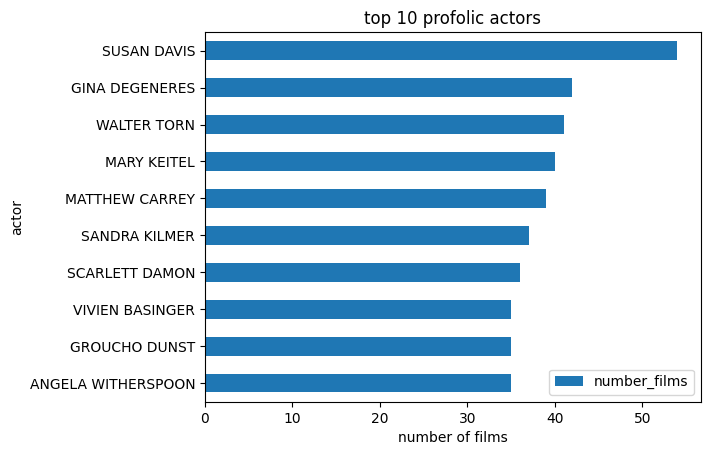

In [67]:
ax = actor_films.head(10).plot(
    kind="barh", 
    x="actor", 
    y="number_films", 
    title = "top 10 profolic actors",
    xlabel="number of films") 
ax.invert_yaxis()